In [1]:
from ModellingUtilities import *
from PlotUtilities import *
def remove_labels(axes):
    axes.set_yticklabels([])
    axes.set_xticklabels([])
    axes.set_xticks([])
    axes.set_yticks([])
    return

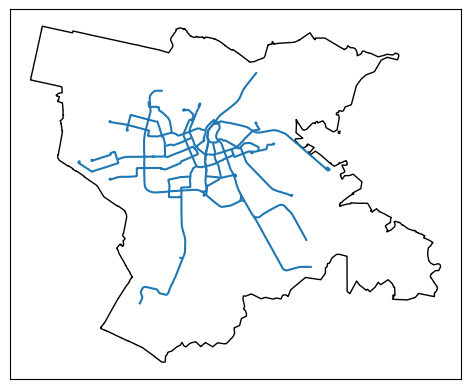

In [28]:
fig, ax = plt.subplots()
merged_gdf.plot(facecolor = 'None', linewidth = 1, ax = ax, color = 'Black')
gpd.read_file('../PublicGeoJsons/Transport/AmsLines.json').to_crs(28992).plot(ax = ax)
remove_labels(ax)

<Axes: >

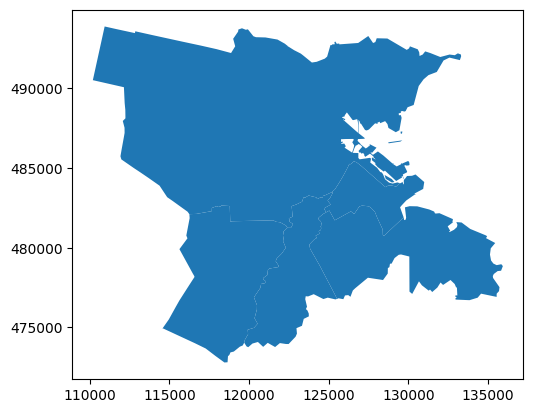

In [40]:
Gem.plot()

In [46]:
import geopandas as gpd
from shapely.geometry import MultiPolygon

# Assuming 'Gem' is already loaded as a GeoDataFrame

# Convert the entire GeoDataFrame into a single MultiPolygon
geom_union = Gem.geometry.unary_union

if isinstance(geom_union, MultiPolygon):
    polygons = list(geom_union.geoms)
else:  # The result was a single Polygon, make it a list for consistency
    polygons = [geom_union]

sorted_polygons = sorted(polygons, key=lambda polygon: polygon.area, reverse=True)
two_largest_polygons = sorted_polygons[:2]

# Find the centroids of these two largest Polygons
centroids = [polygon.centroid for polygon in two_largest_polygons]

print(centroids)

[<POINT (122067.58 484385.053)>, <POINT (128796.545 484303.464)>]


In [ ]:
shapely.point(12000)

[]

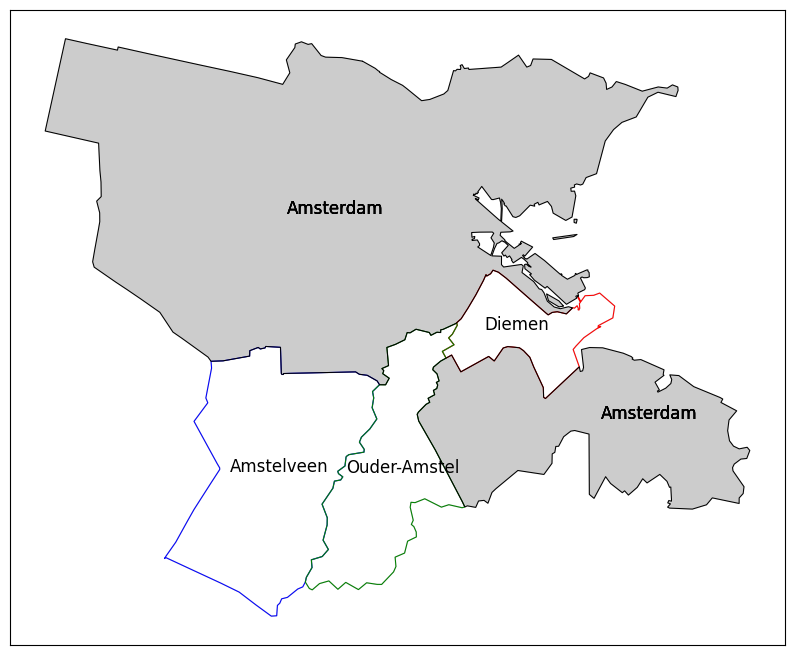

In [29]:
#AADO diagram sepaarated Gemeenten
# pd.read_pickle('../PublicGeoJsons/AADO_PC4.geojson')
Gem = gpd.read_file('../PublicGeoJsons/Gemeenten.geojson')
Gem = Gem[Gem.statnaam.isin(['Amsterdam', 'Diemen', 'Amstelveen', 'Ouder-Amstel'])]
staats = ['Diemen', 'Amstelveen', 'Ouder-Amstel', 'Amsterdam']
colors = ['red', 'blue', 'green', 'black']
fig, ax = plt.subplots(figsize=(10, 10))
Gem.boundary.plot(ax=ax, color='lightgrey', linewidth=1)

Gem[Gem['statnaam'] == 'Amsterdam'].plot(alpha = 0.2, color = 'black', ax = ax)

for idx, city in enumerate(staats):
    # Subset GeoDataFrame for the specific city
    subset = Gem[Gem['statnaam'] == city]
    subset.boundary.plot(ax=ax, color=colors[idx], linewidth=0.75)

    # Plotting the city name at the centroid
    for x, y, label in zip(subset.geometry.centroid.x - 1500, subset.geometry.centroid.y, subset['statnaam']):
        if label != 'Amsterdam':
            ax.text(x, y, label, fontsize=12)


    plt.text(119000, 487500, "Amsterdam", fontsize=12)
    plt.text(130500, 480000, "Amsterdam", fontsize=12)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

[]

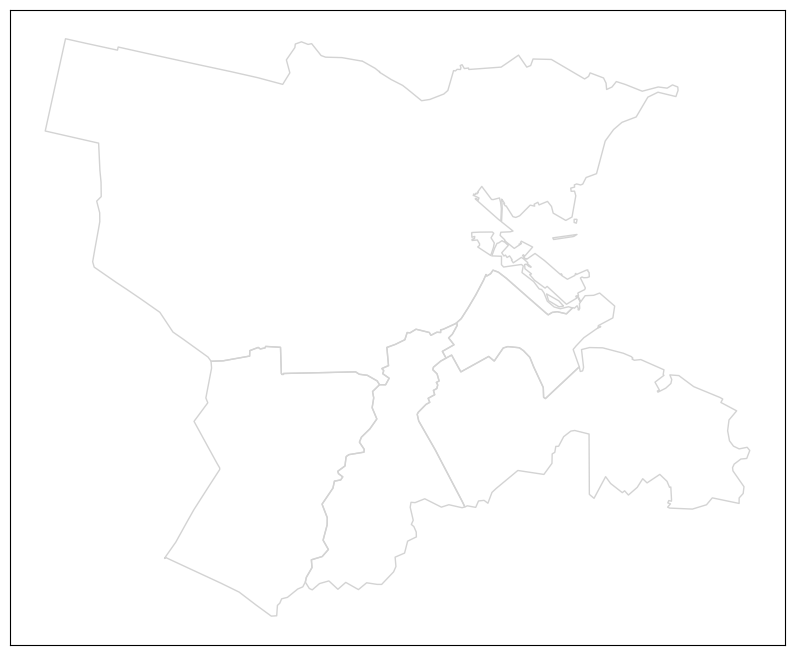

In [32]:
#AADO diagram sepaarated Gemeenten
# pd.read_pickle('../PublicGeoJsons/AADO_PC4.geojson')
Gem = gpd.read_file('../PublicGeoJsons/Gemeenten.geojson')
Gem = Gem[Gem.statnaam.isin(['Amsterdam', 'Diemen', 'Amstelveen', 'Ouder-Amstel'])]
staats = ['Diemen', 'Amstelveen', 'Ouder-Amstel', 'Amsterdam']
colors = ['red', 'blue', 'green', 'black']
fig, ax = plt.subplots(figsize=(10, 10))
Gem.boundary.plot(ax=ax, color='lightgrey', linewidth=1)

# Gem[Gem['statnaam'] == 'Amsterdam'].plot(alpha = 0.2, color = 'None', ax = ax)
#
# for idx, city in enumerate(staats):
#     # Subset GeoDataFrame for the specific city
#     subset = Gem[Gem['statnaam'] == city]
#     subset.boundary.plot(ax=ax, color=colors[idx], linewidth=0.75)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

[]

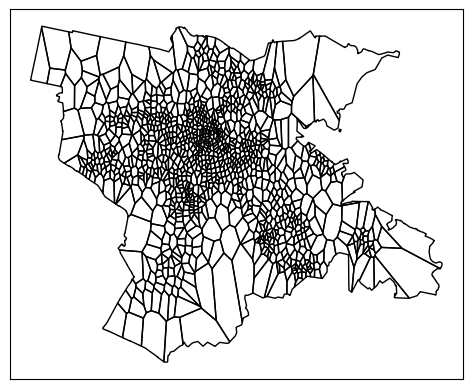

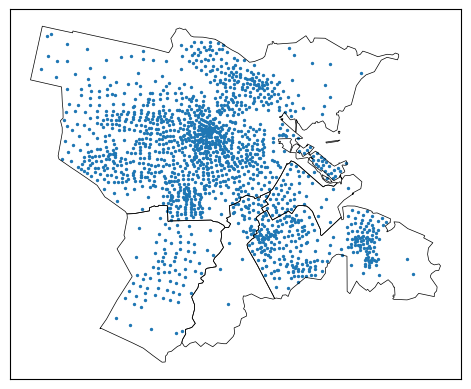

In [39]:
#Centroids and polygons
im = pd.read_pickle('../Misc/AADO_VMA_polygons').plot(facecolor = 'None')
im.set_yticklabels([])
im.set_xticklabels([])
im.set_xticks([])
im.set_yticks([])
fig, ax = plt.subplots()
Centroids = pd.read_pickle('../VMA/VMA_Cleaning/Clean Data/Centroids/CleanCentroids')

Centroids.to_crs(28992).overlay(Gem).plot(ax = ax, markersize = 2)
Gem.boundary.plot(ax = ax, facecolor = 'None', linewidth = 0.5, edgecolor = 'Black')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

[]

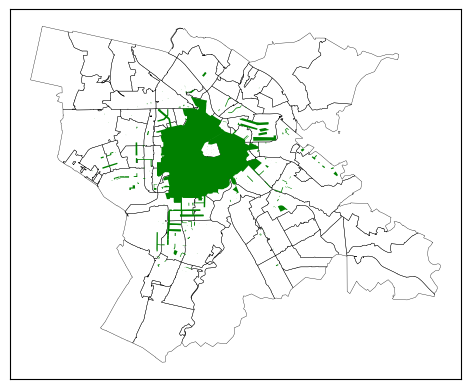

In [35]:
#Amsterdam Service Area
fig, ax = plt.subplots()
AADO.to_crs(28992).plot(ax = ax, facecolor = 'None', linewidth = 0.25)
pd.read_pickle('../Misc/AADOServiceArea').to_crs(28992).plot(ax = ax, color = 'Green')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

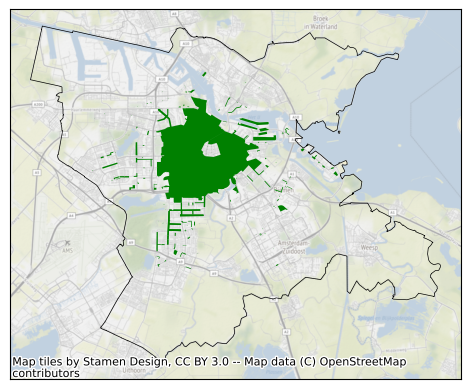

In [22]:
gdfA = pd.read_pickle('../PublicGeoJsons/AADO_PC4.geojson').to_crs(28992)
boundary_gdf = gpd.GeoDataFrame(gdfA.index, geometry=gdfA['geometry'].boundary)
merged_geometry = gdfA['geometry'].unary_union
merged_gdf = gpd.GeoDataFrame(geometry=[merged_geometry.boundary])
import contextily

fig, ax = plt.subplots()
pd.read_pickle('../Misc/AADOServiceArea').to_crs(28992).plot(ax = ax, color = 'Green')
merged_gdf.plot(facecolor = 'None', linewidth = 0.5, ax = ax, color = 'Black')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
cx.add_basemap(ax, crs= gdfA.crs.to_string(), alpha =0.6)

In [5]:
gdfA = pd.read_pickle('../PublicGeoJsons/Water/AADO_PC4_nowater.geojson').to_crs(28992)

[]

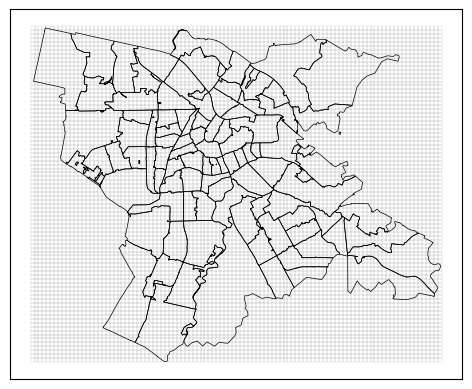

In [62]:
city = 'AADO'
square_size = 250
fig, ax = plt.subplots()
AADO.to_crs(28992).plot(ax = ax, facecolor = 'None',  linewidth = 0.5)
pd.read_pickle('../Demand Modelling/Grids/' + city + '/' + str(square_size)).plot(
    facecolor = 'None', ax = ax, linewidth = 0.05)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

In [39]:
len(pd.read_pickle('../Demand Modelling/Grids/' + city + '/' + str(square_size)))

8840

In [58]:
grid = pd.read_pickle('../Demand Modelling/Grids/' + 'AADO' + '/' + str(250))
Amenities = pd.read_pickle('../OSM/Amenities/AmenitiesGrid250')
Horeca = Amenities[['restaurant', 'fast_food', 'cafe', 'pub', 'bar']]
Horeca['Horeca'] = Horeca.sum(axis = 1)
tp = grid.join(Horeca['Horeca'])

/var/folders/99/r_wg55g56p13sfs9r698z04w0000gn/T/ipykernel_11243/2084337322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Horeca['Horeca'] = Horeca.sum(axis = 1)


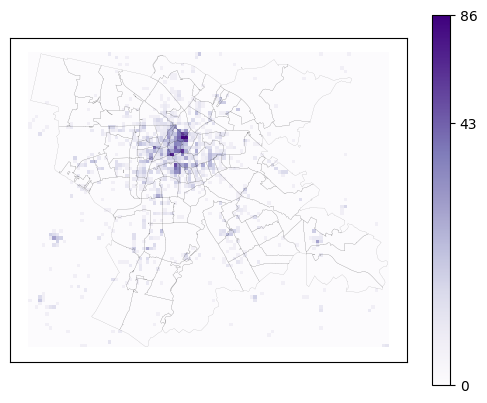

In [69]:
import matplotlib.colors as mcolors
import numpy as np

fig, ax = plt.subplots()

power = 0.5  # You can adjust this based on your data's requirement
tp['power_tp'] = np.power(tp['Horeca'], power)

vmin, vmax = tp['Horeca'].min(), tp['Horeca'].max()
norm_power = mcolors.PowerNorm(gamma=power, vmin=vmin, vmax=vmax)

cax = tp.plot(column='Horeca', ax=ax, legend=False, cmap='Purples', norm=norm_power)

# Color values based on the power of the data
sm = plt.cm.ScalarMappable(cmap='Purples', norm=norm_power)
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

# Adjust ticks as per your requirements
cbar_ticks = [vmin, (vmin + vmax) / 2, vmax]
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels([int(tick) for tick in cbar_ticks])


# import matplotlib.colors as colors
AADO = pd.read_pickle('../PublicGeoJsons/AADO_PC4.geojson')
        # vmax = Horeca[Horeca.Horeca > 0].Horeca.mean() * 5, vmin = 2)
AADO.to_crs(28992).plot(ax = ax, facecolor = 'None', linewidth = 0.05)
remove_labels(ax)


In [103]:
Fend = pd.read_pickle('../FelyxData/Raw Movement/FelyxAADO')[['geometry', 'carId']]
Fendg = Fend.sjoin(AADO).groupby('index_right').count()

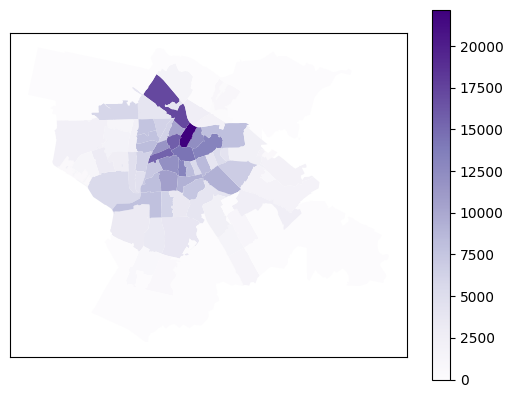

In [104]:
ax = AADO.join(Fendg[['carId']]).fillna(0).plot(column = 'carId', legend = True, cmap = 'Purples')
remove_labels(ax)

In [105]:
Fstart = pd.read_pickle('../FelyxData/Raw Movement/FelyxAADO')[['prev_location', 'carId']].set_geometry('prev_location')


In [106]:
Fstartg = Fstart.sjoin(AADO)

In [107]:
Fstartgg = Fstartg.groupby('index_right').count()

In [108]:
Fstartgg

,prev_location,carId,OBJECTID,Aantal_adreslocaties,Aantal_multiparts,SHAPE_Length,SHAPE_Area
index_right,,,,,,,
1011,12184,12184,12184,12184,12184,12184,12184
1012,22178,22178,22178,22178,22178,22178,22178
1013,17414,17414,17414,17414,17414,17414,17414
1014,3991,3991,3991,3991,3991,3991,3991
1015,10086,10086,10086,10086,10086,10086,10086
...,...,...,...,...,...,...,...
1183,3769,3769,3769,3769,3769,3769,3769
1185,818,818,818,818,818,818,818
1186,688,688,688,688,688,688,688


In [109]:
Fendg

,geometry,carId,OBJECTID,Aantal_adreslocaties,Aantal_multiparts,SHAPE_Length,SHAPE_Area
index_right,,,,,,,
1011,12294,12294,12294,12294,12294,12294,12294
1012,22164,22164,22164,22164,22164,22164,22164
1013,17167,17167,17167,17167,17167,17167,17167
1014,4020,4020,4020,4020,4020,4020,4020
1015,10234,10234,10234,10234,10234,10234,10234
...,...,...,...,...,...,...,...
1183,3793,3793,3793,3793,3793,3793,3793
1185,818,818,818,818,818,818,818
1186,697,697,697,697,697,697,697


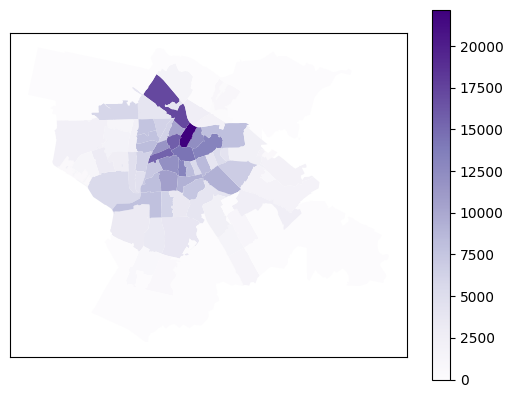

In [110]:
ax = AADO.join(Fendg[['carId']]).fillna(0).plot(column='carId', legend=True, cmap='Purples')
remove_labels(ax)

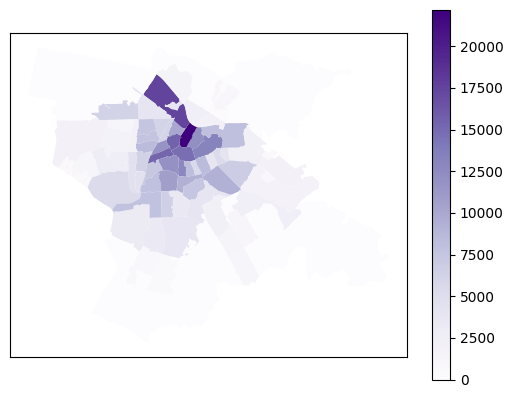

In [112]:
ax = AADO.join(Fstartgg[['carId']]).fillna(0).plot(column='carId', legend=True, cmap='Purples')
remove_labels(ax)